In [ ]:
# 머신 러닝 프로세스

# 문제 파악 > 데이터탐색 > 데이터 전처리 > 모델학습 > 예측



In [3]:
 # 붓꽃의 품종 판별

import pandas as pd # 데이터 분석 모듈
import numpy as np  # 데이터 계산 모듈

from sklearn import datasets #머신러닝 관련 모듈
iris= datasets.load_iris()#내장 데이터셋 읽어오기

In [5]:
#iris 데이터셋 확인 (기본적으로 딕셔너리로 구성되어 있다.)
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
print(iris['DESCR'])
    #설명 변수 feature
            # - sepal length in cm 꽃받침 길이
            # - sepal width in cm 꽃받침 너비
            # - sepal length in cm 꽃잎의 길이
            # - sepal width in cm 꽃잎의 너비
            
    #목표 변수 class
            # - Iris-Setosa       0
            # - Iris-Varsicolour  1
            # - Iris-Virginica    2

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [8]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [14]:
# 데이터 프레임으로 변환 - 데이터를 2차원으로 받는다 (pandas 의 자료형)

df = pd.DataFrame(iris['data'], columns = iris['feature_names'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [16]:
#  열 이름 변환
df.columns = ['sepal_length','sepal_width','petal_length','petal_width']
df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [17]:
df['target']=iris['target']
df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [18]:
#데이터 프레임 확인하기
df.info() #기본정보 확인하기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [19]:
df.describe() #통계정보

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
df.isnull().sum()  # 결측치 확인 <- 없음 

# 결측치를 발견할 경우 일반적으로는 평균값이나 최빈값으로 결측치를 대체한다. 
# 결측치는 자료를 수집하거나 정리하는 과정에서 누락되어 유효한 데이터가 없는 경우이다. 
# 대부분의 머신러닝 알고리즘은 결측값이 있으면 오류가 발생된다.따라서 결측치를
# 유효한 값으로 대체하거나 결측값을 삭제하는 처리가 반드시 필요하다. 

In [22]:
# 상관 관계 분석
df.corr()


,sepal_length,sepal_width,petal_length,petal_width,target
sepal_length,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal_width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal_length,0.871754,-0.428440,1.000000,0.962865,0.949035
petal_width,0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


<AxesSubplot:>

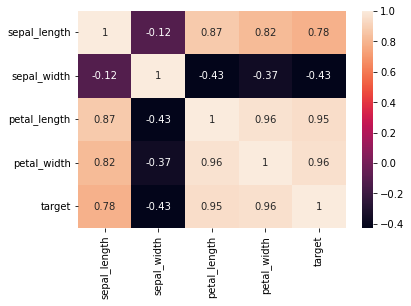

In [23]:
#상관관계 시각화
import seaborn as sns #시각화 관련 모듈

sns.heatmap(data=df.corr(),annot=True)

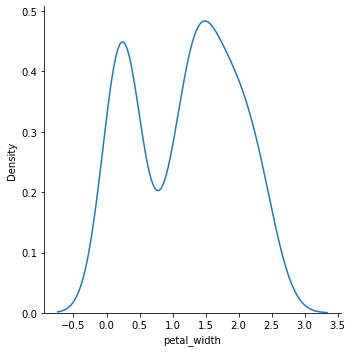

In [24]:
# 정규분포 확인
sns.displot(x='petal_width', data=df,kind='kde')

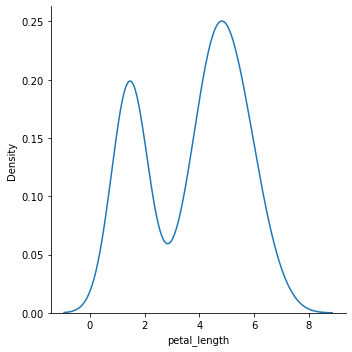

In [26]:
# 정규분포 확인
sns.displot(x='petal_length', data=df, kind='kde')

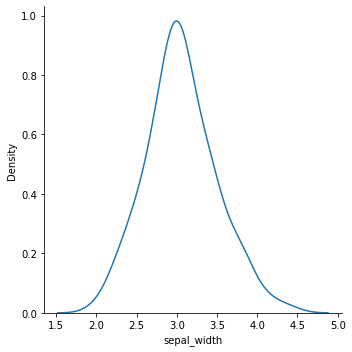

In [25]:
sns.displot(x='sepal_width', data=df, kind='kde')

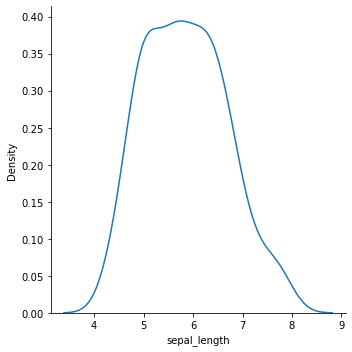

In [29]:
sns.displot(x='sepal_length', data=df, kind='kde')

In [ ]:
sns.pairplot(df, hue='target')

In [28]:
# 훈련용 train 과 검증용 test 데이터 셋 분할
# 모델 학습에 사용할 훈련용 데이터와 
#모델 성능 평가로 사용할 검증용 test 데이터로 분리하자. 

#df을 문제지와 답안지 형태로 다시 분할한다.

#문제지 
#X_data=df.loc[행, 열]
X_data=df.loc[:, 'petal_length': 'petal_width']

#답안지
y_data=df.loc[:,'target']

In [30]:
X_data

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [31]:
y_data

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2,shuffle=True, random_state=20)

In [38]:
y_test.shape

(30,)

In [45]:
from sklearn import neighbors
####################################################################################

# KNN Algorithm (K-Nearest-Neighbors) 
# 예측하려는 데이터 X가 주어지면 기존 데이터 중 속성이 비슷한 K개의 이웃을 찾는다. 
# 다시 말해 X를 둘러싼 주변의 K개의 가장 가까운 이웃을 찾아 그 이웃들이 가장 많이 속해있는
# 클래스를 예측 값으로 결정한다. 

from sklearn.neighbors import KNeighborsClassifier  # KNN 불러오기
knn = KNeighborsClassifier(n_neighbors = 7)           # KNN 객체생성, k값 지정

# 학습
knn.fit(X_train,y_train)                            
# 예측
y_knn_pred=knn.predict(X_test)                      
#평가
from sklearn.metrics import accuracy_score
knn_acc=accuracy_score(y_test,y_knn_pred)
knn_acc



0.9333333333333333

In [ ]:
# SVM Support Vector Machine

# 각 피처 들이  고유의 축을 갖는 공간을 이룬다고 가정한다. 
# 모든 데이터를 공간 내의 좌표에 점으로 표시하고 각 데이터가 속하는 군집을 이룬다고 가정한다. 
# 이때 각 군집까지의 거리를 최대 한 멀리 유지하는 경계면을 찾는다. 이렇게 하여 각 군집을
# 서로 확연하게 구분할 수 있다. 

from sklearn.svm import SVC
svc = SVC(kernel='rbf')


In [48]:
# Ask for a number below 50 and then count down from 50 to that number,
#50 미만의 수를 입력 받아 50부터 카운트 다운 해서 그 수까지 간다
# making sure you show the number they entered in the output.
#입력한 값이 결과에 나와야한다.

n=int(input('enter number below 50 >>'))

for i in range(50,n-1,-1):
    print(i)


enter number below 50 >>40
50
49
48
47
46
45
44
43
42
41
40


In [50]:
# Set a variable called total to 0. Ask the user to enter five numbers and after each 
# input ask them if they want that number included. 
# If they do, then add the number to the total.
# After they have entered all five number, display the total.

#tatal이라는 변수에 0을 설정하세요
#5번 숫자를 입력하라고 반복 요청하고 숫자를 입력할 때마다 입력한 값을 
#total에 더할 것인지를 묻는다.
# 더하길 원하는 답을 하면 total에 더하고
#아니면 더하지는 않는다 5번 숫자를 입력하면 total 출력한다.

total=0
a=[]
for i in range(5):
    num=int(input('Enter a number >> '))
    ans=input('Do you want this number included?(Y/N)')
    if ans=='y':
        total+=num
        
print(total)

Enter a number >> 1
Do you want this number included?(Y/N)y
Enter a number >> 2
Do you want this number included?(Y/N)y
Enter a number >> 3
Do you want this number included?(Y/N)n
Enter a number >> 4
Do you want this number included?(Y/N)y
Enter a number >> 5
Do you want this number included?(Y/N)
7
